<a href="https://colab.research.google.com/github/Mainakdeb/project-nova/blob/main/explore_and_preprocess_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!wget https://s3.amazonaws.com/space2vec-public/post3/extra_small_normalized_image_object_data_in_numpy_format.pkl

In [ ]:
!wget https://s3.amazonaws.com/space2vec-public/post3/extra_small_all_object_data_in_dictionary_format.pkl

In [130]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm, tnrange
from PIL import Image
import seaborn as sn


In [ ]:
# !mkdir ext_sm_images

In [60]:
DATA_PATH='/content/'
ALL_DATA_FILE = "extra_small_all_object_data_in_dictionary_format.pkl"
NORMALIZED_IMAGE_DATA_FILE = "extra_small_normalized_image_object_data_in_numpy_format.pkl"

In [61]:
all_data = pickle.load(open(DATA_PATH + ALL_DATA_FILE, "rb"))
all_images_normalized = pickle.load(open(DATA_PATH + NORMALIZED_IMAGE_DATA_FILE, "rb"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


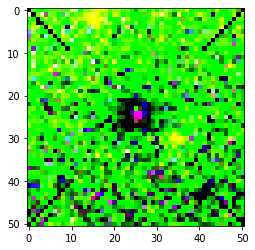

In [85]:
plt.imshow(all_images_normalized[0].transpose(1,2,0).astype(np.float32))

In [148]:
with open(ALL_DATA_FILE, "rb") as f:
    object_ = pkl.load(f)

In [126]:
cols=list(object_.keys())
df = pd.DataFrame(columns = cols)
df #

['images', 'targets', 'file_paths', 'observation_numbers']

In [139]:
targets=object_['targets']
images=list(object_['images'])
paths=object_['file_paths']
ob_num=object_['observation_numbers']

df['targets']=targets
df['images']=images
df['file_paths']=paths
df["observation_numbers"]=ob_num

In [211]:
df.head()

,images,targets,file_paths,observation_numbers
0,"[[[255, 56, 41, 42, 46, 56, 58, 56, 69, 49, 80...",0,/home/ubuntu/notebooks/data/home2/SNWG/Archive...,10713492
1,"[[[255, 81, 120, 64, 61, 33, 40, 89, 53, 96, 9...",0,/home/ubuntu/notebooks/data/home2/SNWG/Archive...,10713475
2,"[[[255, 42, 9, 39, 35, 28, 39, 24, 22, 25, 36,...",0,/home/ubuntu/notebooks/data/home2/SNWG/Archive...,10713459
3,"[[[255, 28, 31, 72, 65, 41, 0, 44, 42, 55, 32,...",0,/home/ubuntu/notebooks/data/home2/SNWG/Archive...,10713470
4,"[[[255, 2, 0, 3, 3, 4, 2, 3, 3, 4, 3, 3, 3, 4,...",1,/home/ubuntu/notebooks/data/home2/SNWG/Archive...,10713469


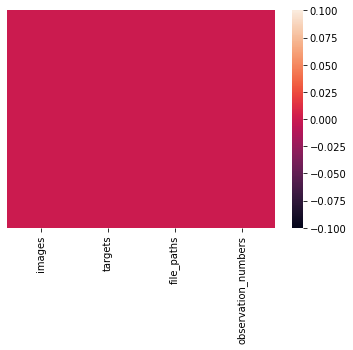

In [142]:
sn.heatmap(df.isnull(), yticklabels=False)

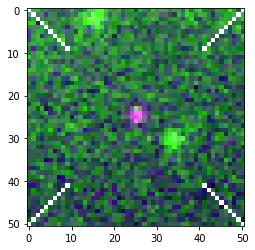

In [149]:
plt.imshow(df['images'][0].transpose(1,2,0))
plt.show()

In [155]:
!mkdir ext_small_images

In [162]:
for i in tnrange(0,len(df)):
    #png.from_array(all_images_normalized[i], 'L').save()
    im0=df['images'][i].transpose(1,2,0)
    im=Image.fromarray(im0)
    path="/content/ext_small_images/ext_sm_"+str(i)+".png"
    im.save(path)


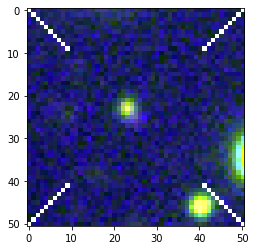

In [187]:
plt.imshow(plt.imread("/content/ext_small_images/ext_sm_2123.png"))

In [173]:
!apt-get install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!zip -r "ext_small_images2.zip" "ext_small_images/"

In [210]:
!rsync --progress "/content/ext_small_images.zip" "/content/gdrive/MyDrive/mydata/"

ext_small_images.zip
    688,482,790 100%   19.75MB/s    0:00:33 (xfr#1, to-chk=0/1)
